---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your pe
ers and the course staff.

In [10]:
import pandas as pd
import numpy as np

def answer_one():
    # read excel
    # skip no-user rows
    # skip no-use footer
    # read col with input variables
    # rename columns with input variable
    energy = pd.read_excel('Energy Indicators.xls'
                           , skiprows = 17
                           , skip_footer = 38, index_col = [2,3,4,5], names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

    # why do we just use dropna()? becasue ... is not na
    # repace will repalce all the items with value equal to '...'
    energy = energy.replace("...", np.nan)
    
    # convert column type
    energy['Energy Supply'] = energy['Energy Supply'].astype('float64')
    # convert column type
    energy['Energy Supply per Capita'] = energy['Energy Supply per Capita'].astype('float64')
    # convert unit
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000

    # initial name mapping dictionary
    mappping = {"Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"}
    #energy['Country'] = energy['Country'].map(mappping)

    # replace no use characters
    energy['Country'] = energy['Country'].str.replace('\d+', '')
    energy['Country'] = energy['Country'].str.replace(' \(.*\)', '')
    
    # change name via replace mapping function
    energy["Country"].replace(mappping, inplace=True)

    
    # read csv
    # skip 4 rows
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    
    GDP['Country Name'] = GDP['Country Name'].str.replace('\d+', '')
    GDP['Country Name'] = GDP['Country Name'].str.replace('\(.*\)', '')
    mappingcountry={"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"}
    #GDP['Country Name'].map(mappingcountry)
    # same job to replace column names
    GDP["Country Name"].replace(mappingcountry, inplace=True)
    
    #print(GDP)

    # read excel
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    # merge energy table with GDP table with inner function
    merge1 = pd.merge(energy,GDP , how='inner', left_on='Country', right_on='Country Name')
    # merge new table with ScimnEn table
    merge2 = pd.merge(merge1, ScimEn, how='inner', left_on='Country', right_on='Country')
    # filter out the record with Rank <=15
    merge2 = merge2[merge2['Rank']<=15]
    # set country as the index
    merge2 = merge2.set_index('Country')

    #return energy
    # get values according to list of column names
    return (merge2.loc[:,['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']])


answer_one()

ValueError: Number of passed names did not match number of header fields in the file

In [9]:
pd.read_excel?

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [3]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [12]:
import pandas as pd
import numpy as np

def answer_two():
    energy = pd.read_excel('Energy Indicators.xls', skiprows = 17, skip_footer = 38, parse_cols = [2,3,4,5], names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

    energy = energy.replace("...", np.nan)
    energy['Energy Supply'] = energy['Energy Supply'].astype('float64')
    energy['Energy Supply per Capita'] = energy['Energy Supply per Capita'].astype('float64')
     
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000

    mappping = {"Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"}
    #energy['Country'] = energy['Country'].map(mappping)

    energy['Country'] = energy['Country'].str.replace('\d+', '')
    energy['Country'] = energy['Country'].str.replace(' \(.*\)', '')
    
    energy["Country"].replace(mappping, inplace=True)

    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    
    GDP['Country Name'] = GDP['Country Name'].str.replace('\d+', '')
    GDP['Country Name'] = GDP['Country Name'].str.replace('\(.*\)', '')
    mappingcountry={"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"}
    #GDP['Country Name'].map(mappingcountry)
    GDP["Country Name"].replace(mappingcountry, inplace=True)
    
    #print(GDP)

    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    merge1 = pd.merge(energy,GDP , how='inner', left_on='Country', right_on='Country Name')
    merge2 = pd.merge(merge1, ScimEn, how='inner', left_on='Country', right_on='Country')
    
    merge3 = pd.merge(energy,GDP , how='outer', left_on='Country', right_on='Country Name')
    merge4 = pd.merge(merge3, ScimEn, how='outer', left_on='Country', right_on='Country')
    #merge2 = merge2[merge2['Rank']<=15]
    #merge2 = merge2.set_index('Country')
    #return energy
    return (len(merge4) - len(merge2) - 4)


answer_two()

TypeError: read_excel() got an unexpected keyword argument `parse_cols`

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [11]:
import numpy as np

def answer_three():
    Top15 = answer_one()
    temp_df = Top15
    temp_df['avgGDP'] = None
    temp_df.reset_index()
    
    for eachindex in temp_df.index:
        templist = temp_df.loc[eachindex,['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].tolist()
        temp_df.loc[eachindex,'avgGDP'] = float(np.mean(templist))
    
    temp_df = temp_df.sort_values(by=['avgGDP'], ascending=False)
    return temp_df['avgGDP']

answer_three()

ValueError: Number of passed names did not match number of header fields in the file

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [44]:
def answer_four():
    Top15 = answer_one()
    TempSeries = answer_three()
    TempData = Top15[Top15.index == TempSeries.index[5]]
    TempData = TempData.reset_index()
    
    return TempData.loc[0]['2015'] - TempData.loc[0]['2006']


answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [45]:
def answer_five():
    Top15 = answer_one()
    
    return np.mean(Top15['Energy Supply per Capita'])

answer_five()

Country
Australia             231.0
Brazil                 59.0
Canada                296.0
China                  93.0
France                166.0
Germany               165.0
India                  26.0
Iran                  119.0
Italy                 109.0
Japan                 149.0
South Korea           221.0
Russian Federation    214.0
Spain                 106.0
United Kingdom        124.0
United States         286.0
Name: Energy Supply per Capita, dtype: float64


157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [63]:
def answer_six():
    Top15 = answer_one()
    Top15 = Top15.reset_index()
    #print(Top15)

    return tuple(Top15[Top15['% Renewable'] == max(Top15['% Renewable'])].loc[:,['Country','% Renewable']].iloc[0])

answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [71]:
def answer_seven():
    Top15 = answer_one()
    
    temp_df = Top15
    temp_df['Ratio'] = None
    temp_df.reset_index()
    
    for eachindex in temp_df.index:
        temp_df.loc[eachindex,'Ratio'] = temp_df.loc[eachindex,'Self-citations'] / temp_df.loc[eachindex,'Citations']
    
    temp_df = temp_df.sort_values(by=['Ratio'], ascending=False)
    temp_df = temp_df.reset_index()
    return tuple(temp_df.loc[0, ['Country','Ratio']])

answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [77]:
def answer_eight():
    Top15 = answer_one()
    
    temp_df = Top15
    temp_df['Population'] = None
    temp_df.reset_index()
    
    for eachindex in temp_df.index:
        temp_df.loc[eachindex,'Population'] = temp_df.loc[eachindex,'Energy Supply'] / temp_df.loc[eachindex,'Energy Supply per Capita']
    
    temp_df = temp_df.sort_values(by=['Population'], ascending=False)
    temp_df = temp_df.reset_index()
    return temp_df.loc[2,'Country']

answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [87]:
def answer_nine():
    Top15 = answer_one()
    
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    #Top15.loc[:, ['Citable docs per Capita', 'Energy Supply per Capita']].corr()
    
    return Top15.loc[:, ['Citable docs per Capita', 'Energy Supply per Capita']].corr().iloc[0,1]

answer_nine()

0.79400104354429435

In [78]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

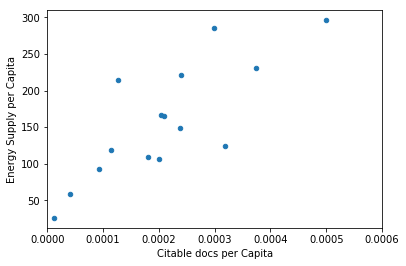

In [79]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [123]:
def answer_ten():
    Top15 = answer_one()
    
    #Top15 = Top15.reset_index()
    Top15['HighRenew'] = 0
    meanRenew = np.median(Top15['% Renewable'])

    for eachindex in Top15.index:
        if Top15.loc[eachindex,'% Renewable'] >= meanRenew :
            Top15.loc[eachindex,'HighRenew'] =  1
        else:
            Top15.loc[eachindex,'HighRenew'] =  0
    
    Top15 = Top15.sort_values(by=['Rank'], ascending=False)
    #print(Top15)

    return Top15['HighRenew']
    
answer_ten()

Country
Brazil                1
Australia             0
Iran                  0
Spain                 1
Italy                 1
South Korea           0
France                1
India                 0
Germany               1
Canada                1
Russian Federation    1
United Kingdom        0
Japan                 0
United States         0
China                 1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [ ]:
def answer_eleven():
    Top15 = answer_one()
    return "ANSWER"

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [ ]:
def answer_thirteen():
    Top15 = answer_one()
    return "ANSWER"

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!